In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
api = wandb.Api()

/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)


In [2]:
runids = { 'B0_000003':'37t5e8ln', 'B0_00001':'3pmlbx39', 'B0_00003':'3v50zkj7', 'B0_00005':'qqi8ao1x', 'B0_0003':'2sm51tsu'}

In [3]:
import seaborn as sns
rundata = {}
runcolors = {}
runcolors2 = {}
colors =list(sns.color_palette("husl", len(runids)))
#colors = list(reversed(colors))
colors2 =list(sns.color_palette("rocket", len(runids)))
colors2 = list(reversed(colors2))

In [4]:


for i, (name, ID) in enumerate(runids.items()):
    run = api.run(f"sholto/learning-from-play_v2/{ID}")
    # save the metrics for the run to a csv file
    metrics_dataframe = run.history()
    metrics_dataframe.to_csv(f"runs/{name}.csv")
    rundata[name] = pd.read_csv(f"runs/{name}.csv")
    runcolors[name] = colors[i]
    runcolors2[name] = colors2[i]

Text(0.5, 1.0, 'MAE action reconstruction loss with plans and encodings. \n  Beta sweep of  3e-6, 1e-5, 3e-5, 5e-5, 3e-4 \n represented with intensity')

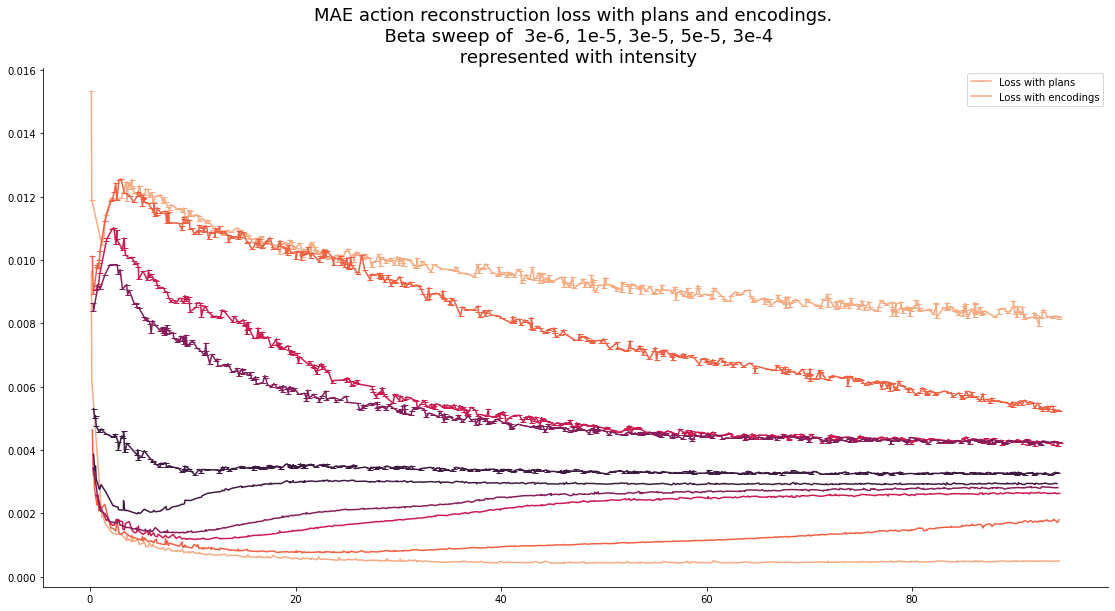

In [5]:
# %matplotlib inline
fig = plt.figure(figsize=(42, 21))

ax = fig.add_subplot(2,2, 1)
#ax2 = fig.add_subplot(2,2, 2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x1,x2,y1,y2,h,w = 47,50,0.0033, 0.0094,0.001, 1
# plt.plot([x1, x1+w, x1+w, x1], [y1, y1, y2,y2], lw=1.5)

# x1,x2,y1,y2,h,w = 47,50,0.00043, 0.00295,0.001, 1
# plt.plot([x1, x1+w, x1+w, x1], [y1, y1, y2,y2], lw=1.5, c=colors2[2])

for name, df in rundata.items():
    time = df['_runtime']/60/60 # Hours!
    step = df['_step']
    x = time
    
    ax.plot(x,df['valid_act_with_plan_loss'], c=runcolors2[name], marker = '_' )
    ax.plot(x,df['valid_act_with_enc_loss'], c=runcolors2[name])
    

plt.legend(['Loss with plans', 'Loss with encodings'])
plt.title('MAE action reconstruction loss with plans and encodings. \n  Beta sweep of  3e-6, 1e-5, 3e-5, 5e-5, 3e-4 \n represented with intensity', fontsize=18)

In [25]:
%matplotlib qt
fig = plt.figure(figsize=(42, 21))

axs = [fig.add_subplot(2,3, i) for i in range(1,7)]

def plot_chart(metric, ax):
    for name, df in rundata.items():
        time = df['_runtime']/60/60 # Hours!
        step = df['_step']
        x = time
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('MAE')
        ax.plot(x,df[metric], c=runcolors2[name])
        ax.set_title(metric.replace('_'," ").title())
    
for i, metric in enumerate(['valid_act_with_enc_loss', 'valid_act_with_plan_loss', 'valid_reg_loss', 'valid_position_loss', 'valid_rotation_loss', 'valid_gripper_loss']):
    plot_chart(metric, axs[i])
axs[0].set_ylim(bottom = 0, top = 0.014)
axs[1].set_ylim(bottom = 0, top = 0.014)
plt.legend(rundata.keys(), bbox_to_anchor=(1.05, 1))

for i in range(3,6):
    axs[i].set_xlabel('Hours')
axs[2].set_ylabel('KL Divergence')

Text(0, 0.5, 'KL Divergence')

In [20]:
def plot(ax, x, y, df, loss='MAE'):
    ax.plot(x, df[y], c=runcolors[name])
    ax.set_title(y.replace('_'," ").title(), fontsize=18)
    ax.set_ylabel(loss)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

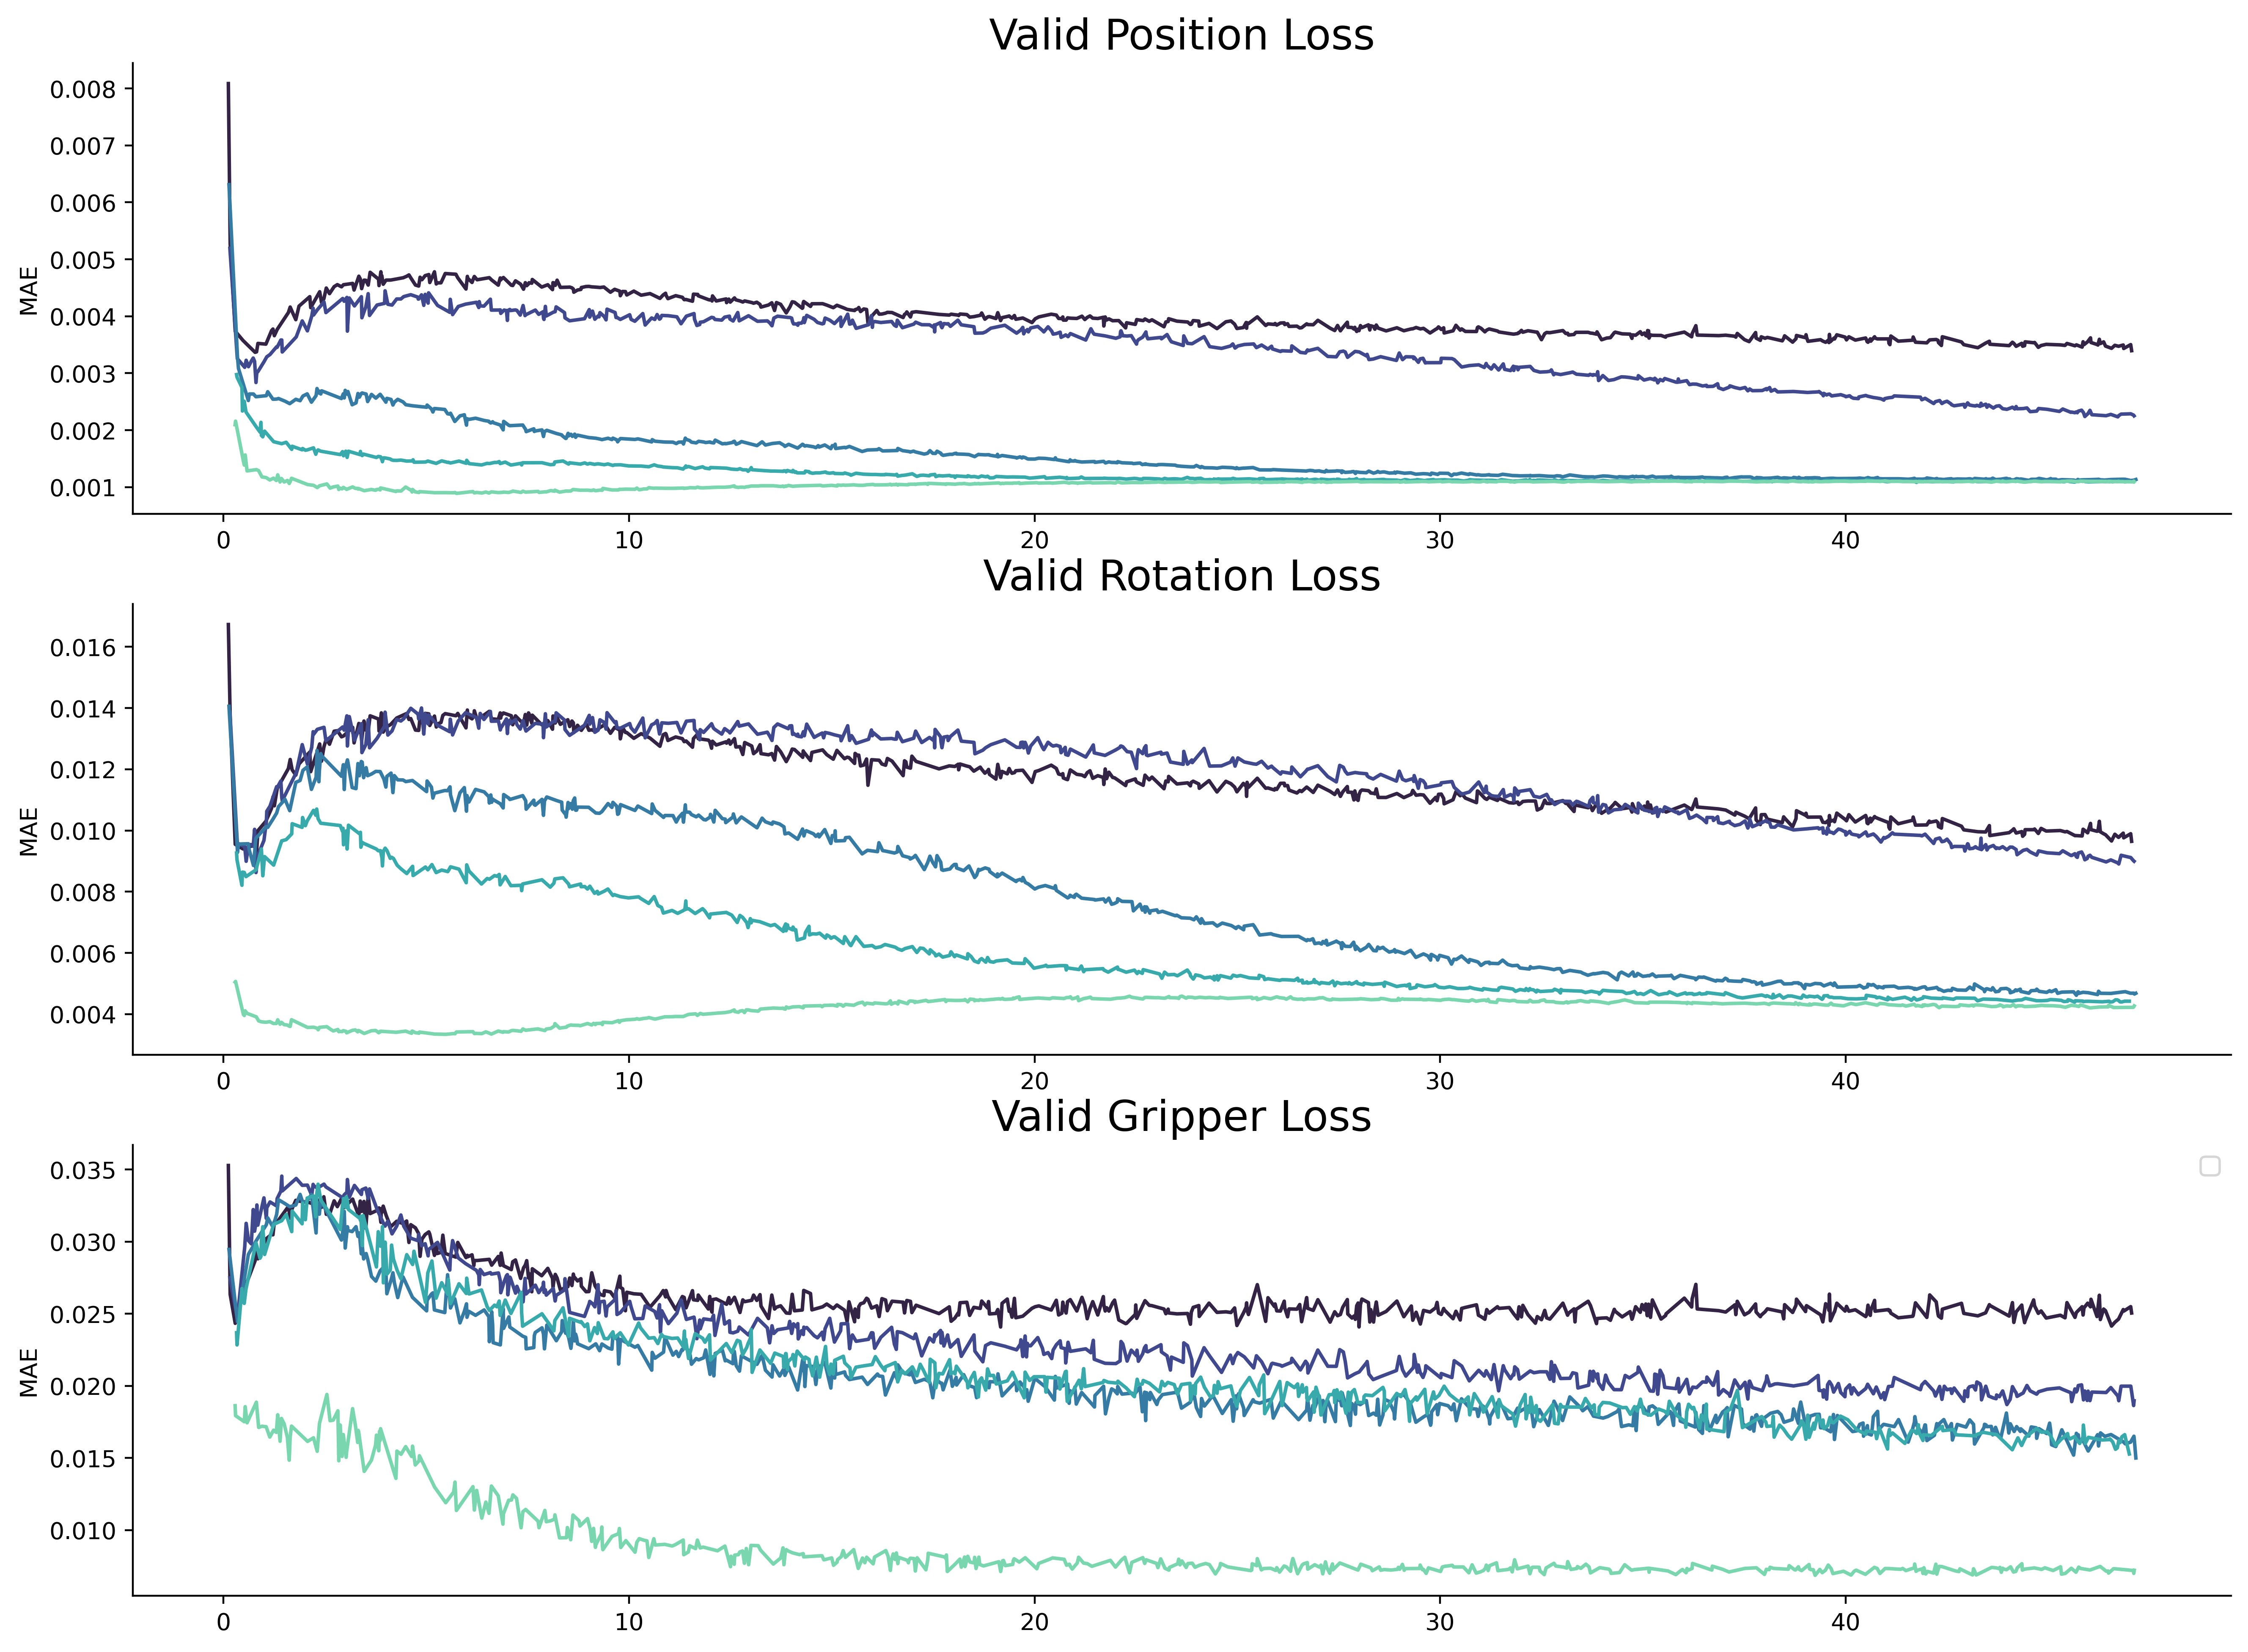

In [22]:
%matplotlib inline

fig, axs = plt.subplots(3, figsize=(16,12),dpi=400)
plt.legend(rundata.keys())
#plt.title('MAE action reconstruction loss of components \n  Beta sweep of  3e-6, 1e-5, 3e-5, 5e-5, 3e-4 \n represented with intensity')

# ax = fig.add_subplot(3,1, 1)
# ax2 = fig.add_subplot(3,1, 2)
# ax3 = fig.add_subplot(3,1, 3)

for name, df in rundata.items():
    time = df['_runtime']/60/60 # Hours!
    step = df['_step']
    x = time
    plot(axs[0], x, 'valid_position_loss',df)
    plot(axs[1], x, 'valid_rotation_loss',df)
    plot(axs[2], x, 'valid_gripper_loss',df)
    




In [4]:
def plot(ax, x, y,i, loss='MAE'):
    ax.clear()
    ax.plot(x, df[y][:i], c=runcolors['B0_00003'])
    ax.set_title(y.replace('_'," ").title())
    ax.set_ylabel(loss)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

<IPython.core.display.Javascript object>


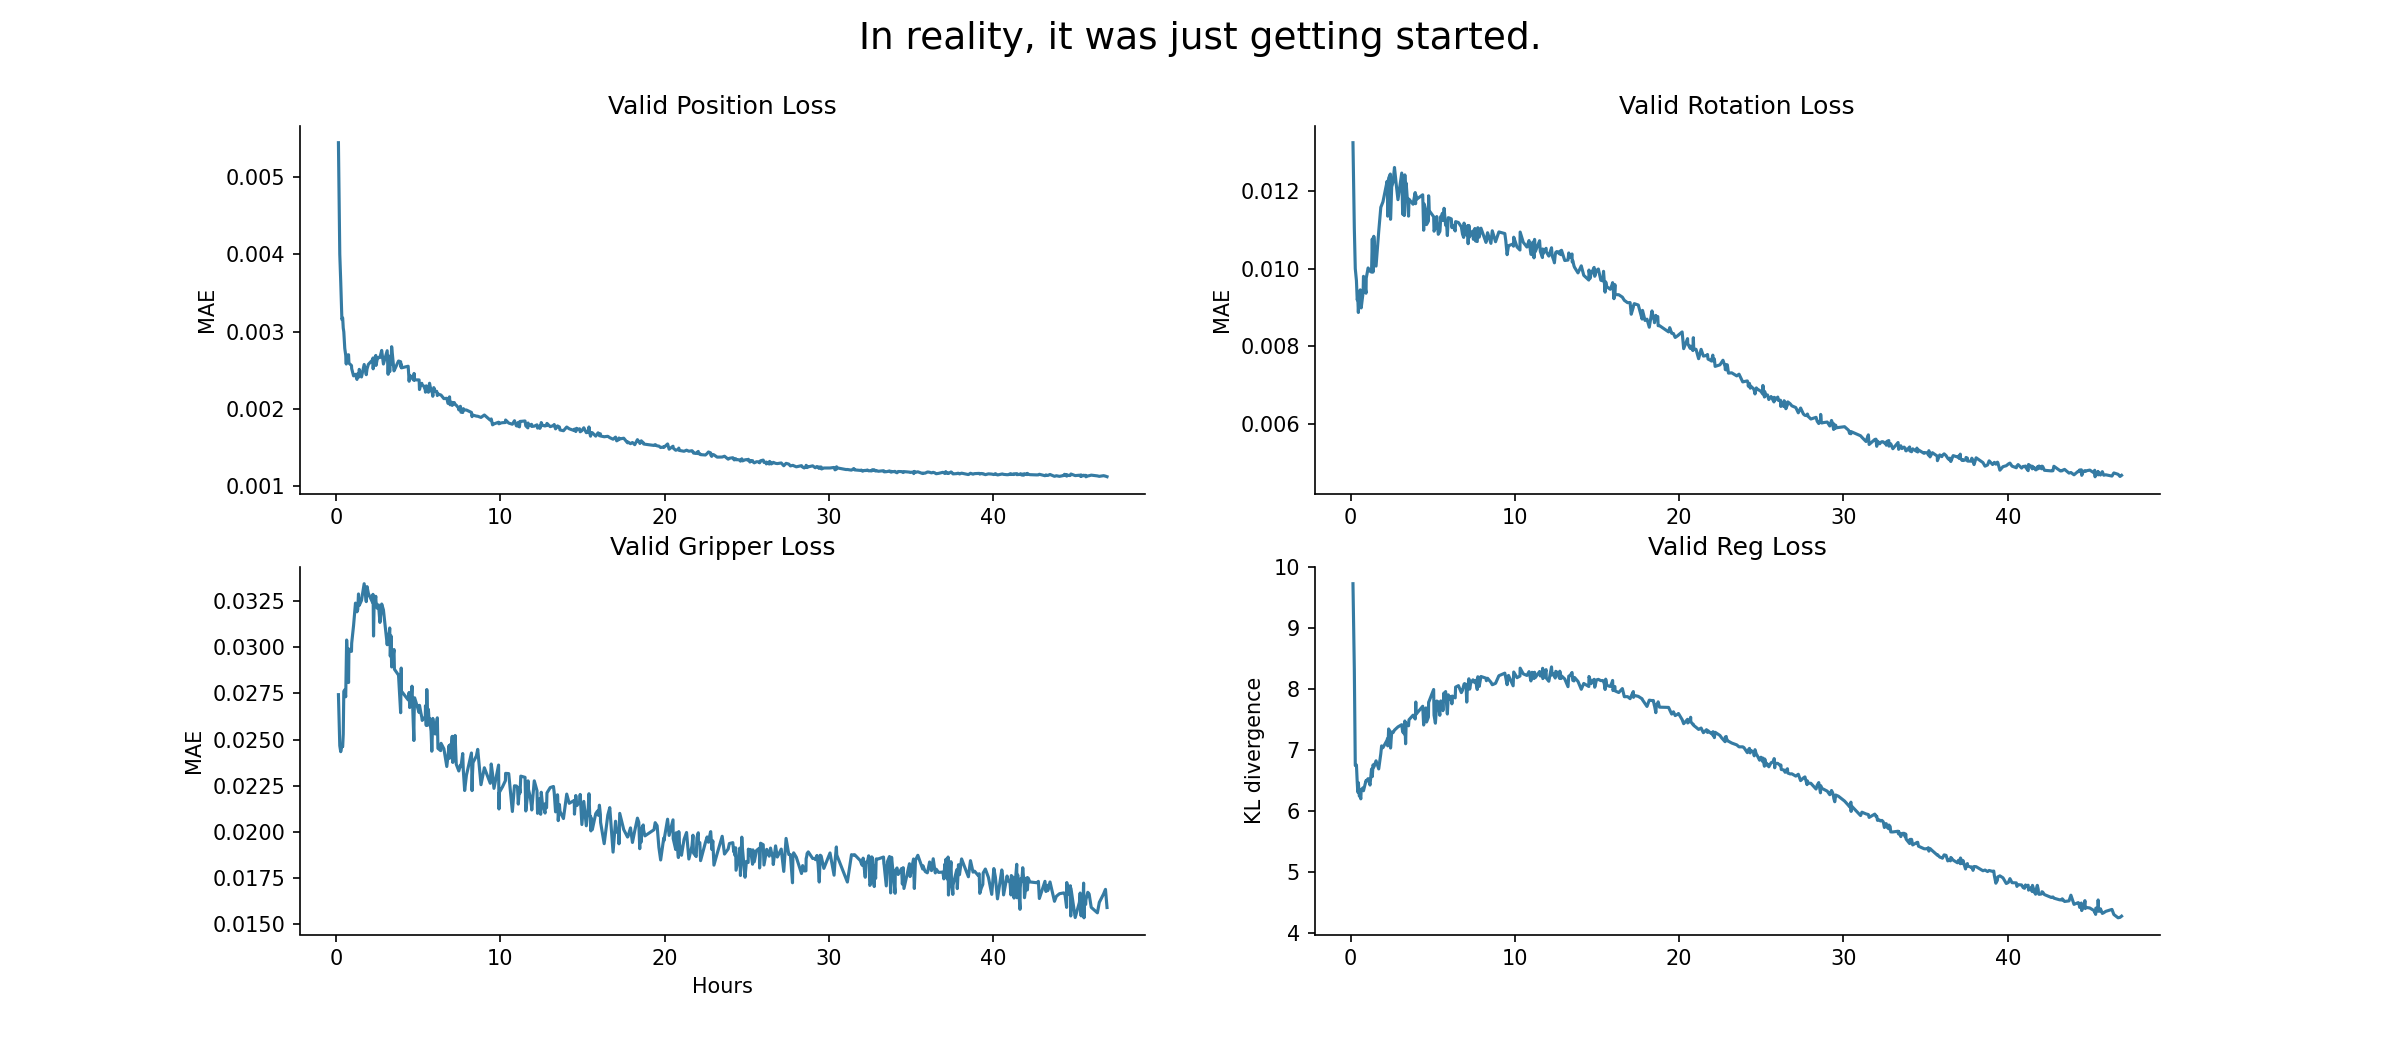

In [7]:
#importing libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

df = rundata['B0_00003']

fig = plt.figure(figsize=(16, 7),dpi=200)
#creating a subplot 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

t = list(np.linspace(1,60, 5))+list(np.linspace(60,90, 30))+list(np.linspace(90,500, 20))
def animate(i):
    i = int(t[i])
    x= time = df['_runtime'][:i]/60/60 # Hours!
    plot(ax1, x, 'valid_position_loss',i)
    plot(ax2, x, 'valid_rotation_loss',i)
    plot(ax3, x, 'valid_gripper_loss',i)
    ax3.set_xlabel('Hours')
    ax4.set_xlabel('Hours')
    plot(ax4, x, 'valid_reg_loss',i, loss = 'KL divergence')

    if np.max(x) > 6 and np.max(x) < 9:
        fig.suptitle('This is typically where Colab times out on an overnight run, somewhat promising, \n but we thought it was levelling off...', fontsize=18)
    elif np.max(x) > 9:
        fig.suptitle('In reality, it was just getting started.', fontsize=18)
    else:
        fig.suptitle(' ', fontsize=16)
    #fig.tight_layout() 

ani = animation.FuncAnimation(fig, animate, frames =len(t), interval=200)
  

In [9]:
writergif = animation.PillowWriter(fps=10) 
ani = animation.FuncAnimation(fig, animate, frames =len(t), interval=200, repeat=False) 
ani.save('convergence.gif', writer=writergif)

<IPython.core.display.Javascript object>


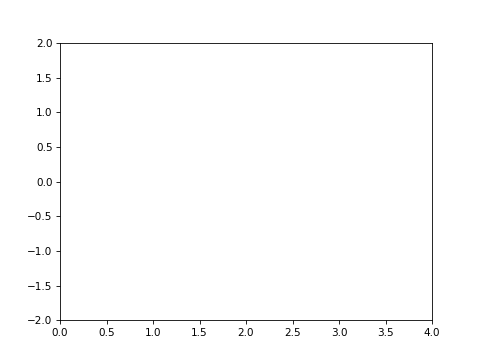

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [3]:
anim